# Loading All Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv("D:\Dataset\dataset.csv")

In [37]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [39]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [40]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [41]:
(df['isFraud']==1).sum()

8213

In [42]:
(df['isFlaggedFraud']==1).sum()

16

In [43]:
(df['isFraud']==0).sum()

6354407

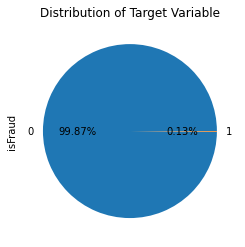

In [45]:
df['isFraud'].value_counts().plot.pie(autopct='%1.2f%%',shadow=False)
plt.title("Distribution of Target Variable")
plt.show()

In [46]:
df['step']=df['step']%24+1
df=df.sort_values(by='step')

In [47]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4386241,1,PAYMENT,7424.48,C1563630777,20866.0,13441.52,M2129969245,0.00,0.00,0,0
1058691,1,CASH_OUT,412867.30,C88227457,0.0,0.00,C480960508,416345.80,829213.09,0,0
1058690,1,CASH_OUT,108422.48,C100708067,0.0,0.00,C1639525130,801624.28,910046.76,0,0
1058689,1,CASH_OUT,87698.73,C493861628,0.0,0.00,C1819196972,111102.25,198800.98,0,0
1058688,1,CASH_OUT,15323.72,C1597053545,12712.1,0.00,C2053105570,75889.45,91213.17,0,0


In [48]:
(df['isFraud']==1).sum()

8213

In [49]:
subset=df[df['isFraud']==1]
subset=subset.sort_values(by='step')
subset.tail()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2787677,24,CASH_OUT,1586479.66,C1427562720,1586479.66,0.0,C911709087,7012.59,1593492.24,1,0
2787676,24,TRANSFER,1586479.66,C109700228,1586479.66,0.0,C546843305,0.00,0.00,1,0
3183428,24,CASH_OUT,495991.64,C1566359738,495991.64,0.0,C634632814,0.00,495991.64,1,0
1019074,24,TRANSFER,36532.84,C905922907,36532.84,0.0,C2062739315,0.00,0.00,1,0
6362619,24,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


Text(0.5, 1.0, 'No Of Fraudalent Transaction happening per hour')

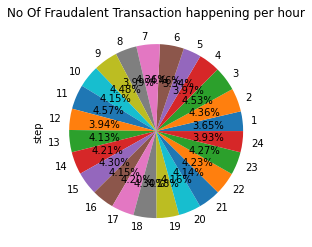

In [50]:
(subset['step']).value_counts().sort_index().plot.pie(autopct='%1.2f%%',shadow=False)
plt.title("No Of Fraudalent Transaction happening per hour")

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [16]:
df = df.drop(['nameOrig','nameDest'],axis=1)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6362620 entries, 4386241 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int32(1), int64(3)
memory usage: 461.2 MB


In [17]:
X=df.drop(['isFraud','isFlaggedFraud'],axis=1)


Y=df['isFraud']


In [56]:
from sklearn.model_selection import train_test_split
np.random.seed(37)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import joblib
from sklearn.metrics import confusion_matrix

In [58]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
filename = 'Logistic_finalized_model.sav'
joblib.dump(LRmodel, filename)

['Logistic_finalized_model.sav']

0.9992306628401507


<AxesSubplot:title={'center':'Confusion Matrix'}>

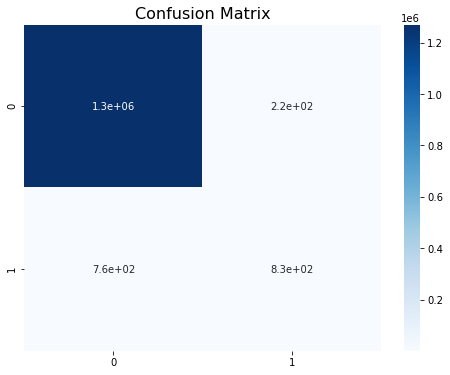

In [59]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

predictions=loaded_model.predict(X_test)
cm=confusion_matrix(y_test,predictions)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix',size=16)
sns.heatmap(cm,annot=True,cmap='Blues')

In [60]:
KNNmodel= KNeighborsClassifier()
KNNmodel.fit(X_train,y_train)
filename='KNN_finalized_model.sav'
joblib.dump(KNNmodel,filename)

['KNN_finalized_model.sav']

In [64]:
loaded_model = joblib.load('KNN_finalized_model.sav')
result = loaded_model.score(X_test, y_test)
print(result)

0.9994758448563642


<AxesSubplot:title={'center':'Confusion Matrix'}>

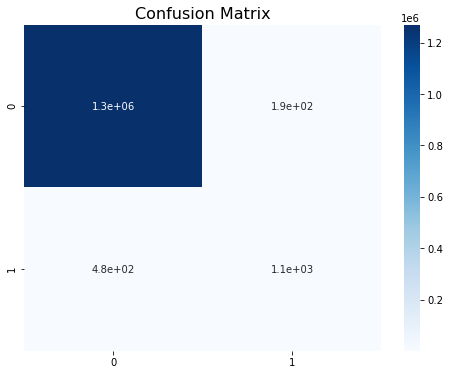

In [65]:
predictions=loaded_model.predict(X_test)
cm=confusion_matrix(y_test,predictions)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix',size=16)
sns.heatmap(cm,annot=True,cmap='Blues')

In [61]:
RFmodel=RandomForestClassifier()
RFmodel.fit(X_train,y_train)
filename='RF_finalized_model.sav'
joblib.dump(RFmodel,filename)

['RF_finalized_model.sav']

0.9997501029450132


<AxesSubplot:title={'center':'Confusion Matrix'}>

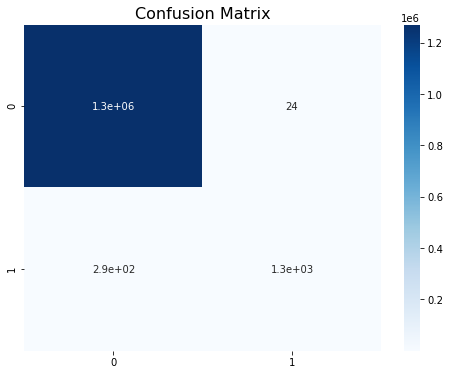

In [66]:
loaded_model = joblib.load('RF_finalized_model.sav')
result = loaded_model.score(X_test, y_test)
print(result)

predictions=loaded_model.predict(X_test)
cm=confusion_matrix(y_test,predictions)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix',size=16)
sns.heatmap(cm,annot=True,cmap='Blues')

In [62]:
SGDmodel=SGDClassifier()
SGDmodel.fit(X_train,y_train)
filename='SGD_finalized_model.sav'
joblib.dump(SGDmodel,filename)

['SGD_finalized_model.sav']

0.9315800723601284


<AxesSubplot:title={'center':'Confusion Matrix'}>

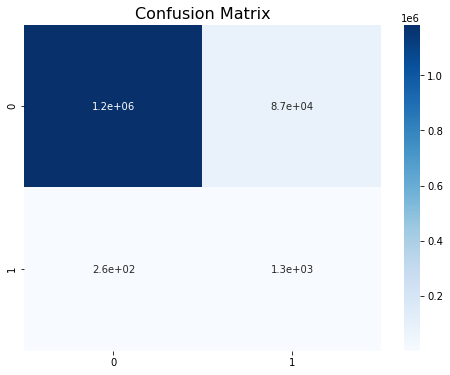

In [67]:
loaded_model = joblib.load('SGD_finalized_model.sav')
result = loaded_model.score(X_test, y_test)
print(result)

predictions=loaded_model.predict(X_test)
cm=confusion_matrix(y_test,predictions)
plt.figure(figsize=(8,6))
plt.title('Confusion Matrix',size=16)
sns.heatmap(cm,annot=True,cmap='Blues')

In [68]:
from imblearn.over_sampling import SMOTE

In [70]:
sm=SMOTE(random_state=42)
X_sm,y_sm=sm.fit_resample(X,Y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100



Shape of X before SMOTE: (6362620, 7)
Shape of X after SMOTE: (12708814, 7)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: isFraud, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.25, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [ ]:
filename='RF_finalized_model.sav'
joblib.dump(model,filename)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score

In [4]:
!pip install xgboost

In [18]:
from xgboost import XGBClassifier

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

In [20]:
xgb = XGBClassifier(seed=42)

In [21]:
xgb.fit(X_train,y_train)

C:\Users\iamre\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:24:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='approx', validate_parameters=1,
              verbosity=None)

In [22]:
print(f1_score(y_test,xgb.predict(X_test)))
print(accuracy_score(y_test,xgb.predict(X_test)))

0.9055269922879179
0.9997689631001065


In [24]:
import joblib
filename='XGB1_finalized_model.sav'
joblib.dump(xgb,filename)

['XGB1_finalized_model.sav']

In [31]:
class_weight = int(y_train.value_counts()[0]/y_train.value_counts()[1])

In [32]:
class_weight

773

In [33]:
xgb1 = XGBClassifier(scale_pos_weight=class_weight,seed=42)

In [34]:
xgb1.fit(X_train,y_train)

C:\Users\iamre\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:53:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=773, seed=42,
              subsample=1, tree_method='approx', validate_parameters=1,
              verbosity=None)

In [35]:
print(f1_score(y_test,xgb1.predict(X_test)))
print(accuracy_score(y_test,xgb1.predict(X_test)))

0.6118135497263635
0.9983835275405415


In [36]:

filename='XGB2_finalized_model.sav'
joblib.dump(xgb,filename)

['XGB2_finalized_model.sav']

In [30]:
y_train.value_counts()

0    5083526
1       6570
Name: isFraud, dtype: int64

In [37]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [38]:
brf = BalancedRandomForestClassifier(n_estimators=300,random_state=0)

In [39]:
brf.fit(X_train,y_train)

BalancedRandomForestClassifier(n_estimators=300, random_state=0)

In [40]:
filename='BRFC_finalized_model.sav'
joblib.dump(xgb,filename)

['BRFC_finalized_model.sav']

In [41]:
print(f1_score(y_test,brf.predict(X_test)))

0.17388535031847133


In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier(n_estimators=300)

In [44]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [46]:
filename='RF_finalized_model.sav'
joblib.dump(rf,filename)

['RF_finalized_model.sav']

In [47]:
print(f1_score(y_test,rf.predict(X_test)))

0.8722615436467812
